<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">Sentiment Analysis for "AAPL" using twitter data - Yearly data</h2>
<p>This notebook examines the relationship between twitter sentiment and stock price.</p>
<h2 style="color: darkblue;">Part 1 of the notebook focusses on sentiment analysis</h2>
<p>I have used NLTK's built-in, pretrained sentiment analyzer VADER (Valence Aware Dictionary and sEntiment Reasoner).
The pre-trained sentiment analyzer returns the 'compound' score for each tweet. This score ranges from -1 (most negative) to +1 ( most positive).</p>
<h2 style="color: darkblue;">Part 2 of the notebook establishes the relationship between twitter sentiment & stock price</h2>
<p>I have downloaded the stock data for Apple from yfinance.</p>
</div>


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/kaggle/input/tweets-about-the-top-companies-from-2015-to-2020/Company_Tweet.csv
/kaggle/input/tweets-about-the-top-companies-from-2015-to-2020/Tweet.csv
/kaggle/input/tweets-about-the-top-companies-from-2015-to-2020/Company.csv


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# import tweets
tweets=pd.read_csv('/kaggle/input/tweets-about-the-top-companies-from-2015-to-2020/Tweet.csv')
company_tweet=pd.read_csv('/kaggle/input/tweets-about-the-top-companies-from-2015-to-2020/Company_Tweet.csv')

tweets=tweets.merge(company_tweet,how='left',on='tweet_id')
# format dates
tweets['date'] = pd.to_datetime(tweets['post_date'], unit='s').dt.date
tweets.date=pd.to_datetime( tweets.date,errors='coerce')
tweets['time'] = pd.to_datetime(tweets['post_date'], unit='s').dt.time

<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">Table/Dataframe for all tweets related to apple in 2018</h2>
<p>View the tweet data for apple below. The data shows twitter handle/name along with the body. The body text is used to estimate the sentiment score.</p>
</div>


In [3]:
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,00:00:57
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,00:01:36
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,00:01:50
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01,00:06:47
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05


In [4]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(tweets,ticker='AAPL',start='2018-01-01',end='2018-12-31'):
    #sbuset
    df=tweets.loc[((tweets.ticker_symbol==ticker)&(tweets.date>=start)&(tweets.date<=end))]
    # applt the SentimentIntensityAnalyzer
    df.loc[:,('score')]=df.loc[:,'body'].apply(lambda x: sia.polarity_scores(x)['compound'])
    # create label
    #bins= pd.interval_range(start=-1, freq=3, end=1)
    df.loc[:,('label')]=pd.cut(np.array(df.loc[:,'score']),bins=[-1, -0.66, 0.32, 1],right=True ,labels=["bad", "neutral", "good"])
    
    df=df.loc[:,["date","score","label","tweet_id","body"]]
    return df

print('apple misses earnings, analyst suggest downgrade , sell now ')
sia.polarity_scores('apple misses earnings, analyst suggest downgrade , sell now ')

apple misses earnings, analyst suggest downgrade , sell now 


{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.2263}

<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">On augmenting the library with stock market jargons / lingo, the sentiment score changes & is a better representation of the actual sentiment</h2>
<p>For the same comments/tweets as in the previous cell, the score becomes more negative (skewed towards negative) after augmenting the library. Notice the results from the below cell.</p>
</div>

In [5]:
# augment vocab

positive_words='high profit Growth Potential Opportunity Bullish Strong Valuable Success Promising Profitable Win Winner Outstanding Record Earnings Breakthrough buy bull long support undervalued underpriced cheap upward rising trend moon rocket hold breakout call beat support buying holding'
negative_words='resistance squeeze cover seller Risk Loss Decline Bearish Weak Declining Uncertain Troubling Downturn Struggle Unstable Volatile Slump Disaster Plunge sell bear bubble bearish short overvalued overbought overpriced expensive downward falling sold sell low put miss'

dictOfpos = { i : 4 for i in positive_words.split(" ") }
dictOfneg = { i : -4 for i in negative_words.split(" ")  }
Financial_Lexicon = {**dictOfpos, **dictOfneg}

sia.lexicon.update(Financial_Lexicon)


print('apple misses earnings, analyst suggest downgrade , sell now ')
sia.polarity_scores('apple misses earnings, analyst suggest downgrade , sell now ')

apple misses earnings, analyst suggest downgrade , sell now 


{'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.7845}

<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">NOTE</h2>
<p>Below table highlights the sentiment score and the label as estimated using the nltk pre-trained library VADER..</p>
</div>



In [6]:
start='2018-01-01'
end='2018-12-31'
ticker='AAPL'
tw=get_sentiment(tweets,ticker,start,end) # get tweets
tw.head()

/tmp/ipykernel_32/3573031547.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,('score')]=df.loc[:,'body'].apply(lambda x: sia.polarity_scores(x)['compound'])
/tmp/ipykernel_32/3573031547.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,('label')]=pd.cut(np.array(df.loc[:,'score']),bins=[-1, -0.66, 0.32, 1],right=True ,labels=["bad", "neutral", "good"])


,date,score,label,tweet_id,body
2516892,2018-01-01,0.8807,good,947619846124122113,How is $AAPL @Apple going to get me to buy a #...
2516898,2018-01-01,-0.3612,neutral,947622772800450561,"$IBM settled -0.4% at $153.42, making for a 20..."
2516900,2018-01-01,0.0000,neutral,947623169241821184,"$AAPL 2018, with 3 new handsets and possibly a..."
2516909,2018-01-01,0.8561,good,947626570226728960,Start investing @RobinhoodApp and get a stock ...
2516910,2018-01-01,0.4981,good,947626976642248704,JOIN NOW! TALK STOCKS IN OUR GOAL ORIENTED CHA...


<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">Exhibit</h2>
<p>Distribution of positive, negative & neutral sentiment by each day.</p>
</div>

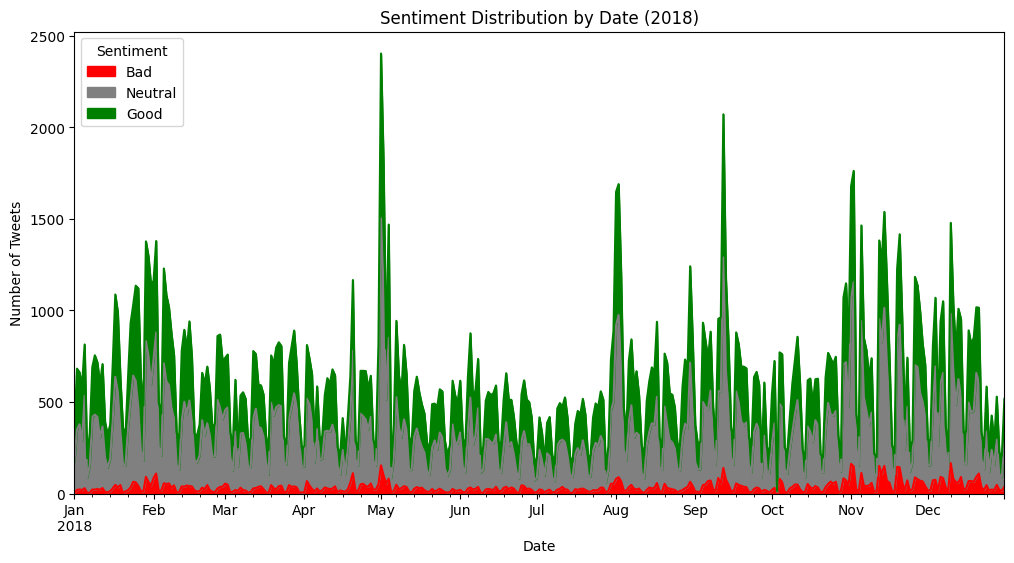

In [7]:
import matplotlib.patches as mpatches

# Convert the 'date' column to datetime objects
tw['date'] = pd.to_datetime(tw['date'])

# Group the data by date and 'label' and count the number of tweets
sentiment_counts = tw.groupby(['date', 'label']).size().unstack(fill_value=0)

# Create an area chart
fig, ax = plt.subplots(figsize=(12, 6))

# Set colors for 'good,' 'neutral,' and 'bad'
colors = {'good': 'green', 'neutral': 'grey', 'bad': 'red'}

area = sentiment_counts.plot.area(stacked=True, ax=ax, color=[colors[c] for c in sentiment_counts.columns])

# Customize the legend
handles = [mpatches.Patch(color=colors[label], label=label.capitalize()) for label in sentiment_counts.columns]
ax.legend(handles=handles, title='Sentiment', loc="upper left")

# Customize the chart
plt.title('Sentiment Distribution by Date (2018)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

plt.show()


<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">NOTE</h2>
<p>The sentiment score is created for each tweet and hence there are multiple sentiment scores for each day. The below code averages out the sentiment score for each day. The average score is then plotted as a line graph. It is noted that the average sentiment score is always positive due to the fact that the overall sentiment score for each day throughout the year is positive (or in other words, there are more positive or neutral tweets that negative tweets). This can also be observed in the above chart which highlights the frequency of positive, negative & neutral tweets.</p>
</div>




In [8]:
# Convert the 'date' column to datetime objects
tw['date'] = pd.to_datetime(tw['date'])

# Group the data by date and calculate the average sentiment score for each day
daily_sentiment = tw.groupby(tw['date'].dt.date)['score'].mean()

daily_sentiment_df = pd.DataFrame({'Date': daily_sentiment.index, 'Average Score': daily_sentiment.values})

# Print the resulting DataFrame
daily_sentiment_df.head()

,Date,Average Score
0,2018-01-01,0.380360
1,2018-01-02,0.329252
2,2018-01-03,0.257666
3,2018-01-04,0.328672
4,2018-01-05,0.188941


<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">Exhibit</h2>
<p>Average sentiment score for tweets related to Apple for each day of the year 2018.</p>
</div>

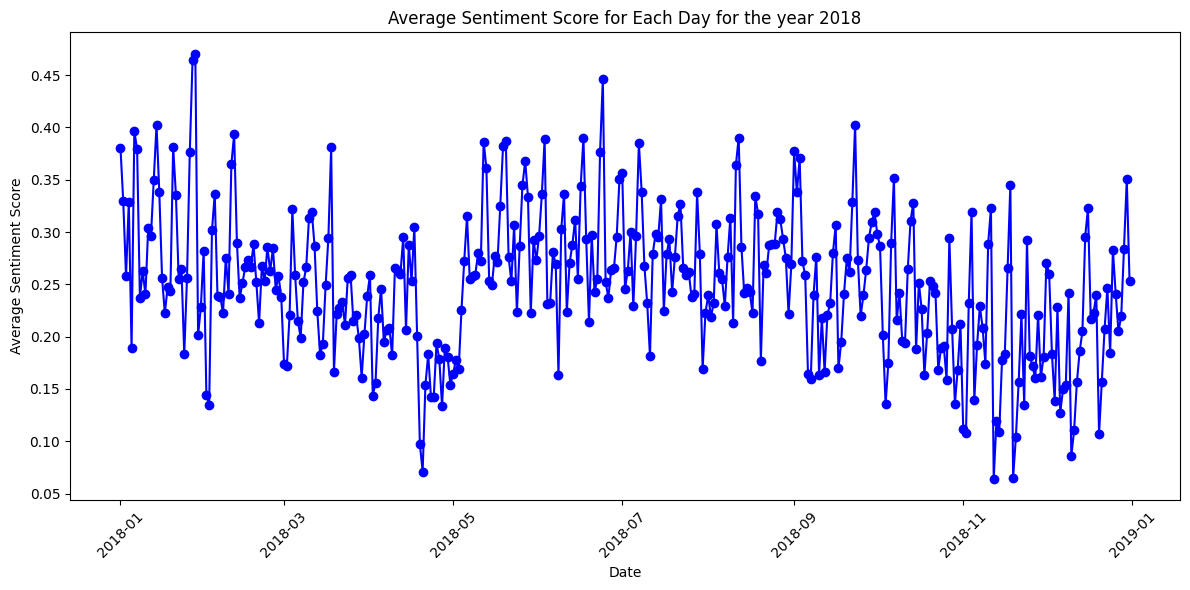

In [9]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the average sentiment scores
ax.plot(daily_sentiment.index, daily_sentiment, marker='o', linestyle='-', color='b')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score for Each Day for the year 2018')

# Format x-axis date labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=290463 sha256=62812925d841eeee0930eb740f5958d92e2be2eb277aa0d034142ebb961bf59a
  Stored in directory: /root/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee


<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">The apple stock data is obtained from yfinance.</h2>
<p>1. The first plot highlights the stock price since beginning. 
2. The second plot higlights the stock price change over 2018 (full year).</p>
</div>

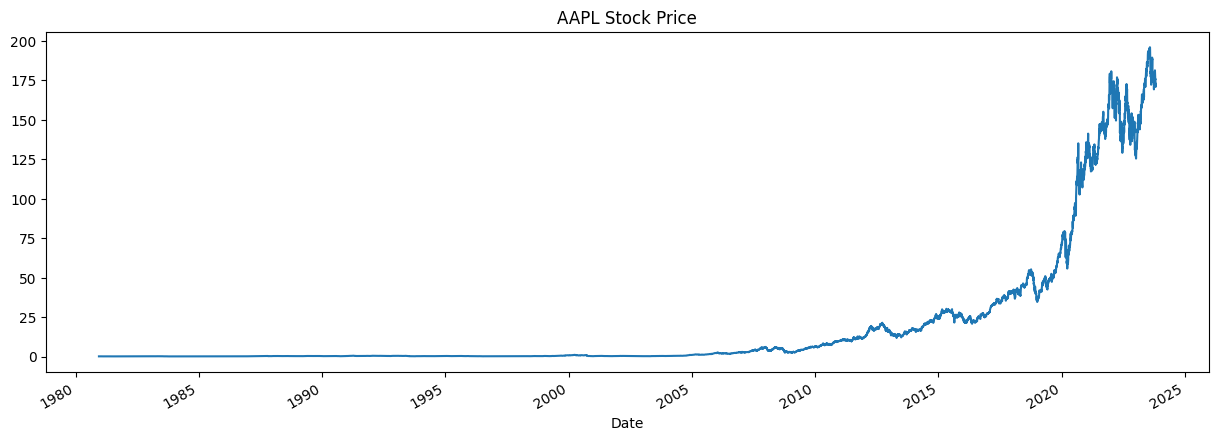

In [11]:
import yfinance as yf
aapl = yf.Ticker("AAPL")
hist = aapl.history(period="max")
hist["Open"].plot(figsize=(15, 5), title="AAPL Stock Price")
plt.show()

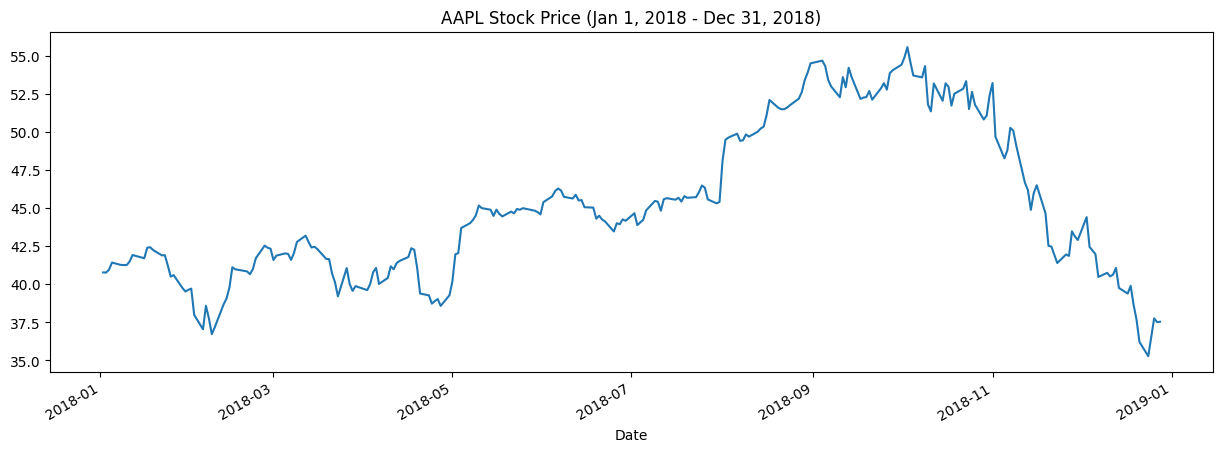

In [12]:
# Define the stock symbol and date range
stock_symbol = "AAPL"
start_date = "2018-01-01"
end_date = "2018-12-31"

# Create a Ticker object for the stock
stock = yf.Ticker(stock_symbol)

# Fetch historical data for the specified date range
hist = stock.history(period="1d", start=start_date, end=end_date)

# Plot the opening prices for the specified date range
hist["Close"].plot(figsize=(15, 5), title=f"{stock_symbol} Stock Price (Jan 1, 2018 - Dec 31, 2018)")
plt.show()

In [13]:
# Define the start and end dates
start_date = '2018-01-01'
end_date = '2018-12-31'

# Create a date range covering the full date range (including weekends and holidays)
date_range = pd.date_range(start=start_date, end=end_date)

# Create a new DataFrame with the full date range
full_hist = pd.DataFrame(index=date_range)

# Ensure that the timezone information for both DataFrames matches
full_hist.index = full_hist.index.tz_localize(hist.index.tz)

# Merge or combine the new DataFrame with the existing 'hist' DataFrame
full_hist = full_hist.combine_first(hist)

# Now, 'full_hist' contains all dates within the specified date range
# with weekends and holidays included, and missing values are filled with NaN.

# If you want to fill NaN values with 0, you can do:
full_hist = full_hist.fillna(0)

# Print or use the updated DataFrame 'full_hist'
full_hist.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
2018-01-01 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2018-01-02 00:00:00-05:00,40.279428,40.785998,40.066382,40.776527,102223600.0,0.0,0.0
2018-01-03 00:00:00-05:00,40.840443,41.318609,40.705518,40.769428,118071600.0,0.0,0.0
2018-01-04 00:00:00-05:00,40.842806,41.062953,40.733919,40.958797,89738400.0,0.0,0.0
2018-01-05 00:00:00-05:00,41.055854,41.512712,40.963535,41.425129,94640000.0,0.0,0.0


<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">Exhibit</h2>
<p>Plotting the sentiment and the stock price in one chart so as to spot any trend/patterns between the two, through manual eye-balling
.</p>
</div>

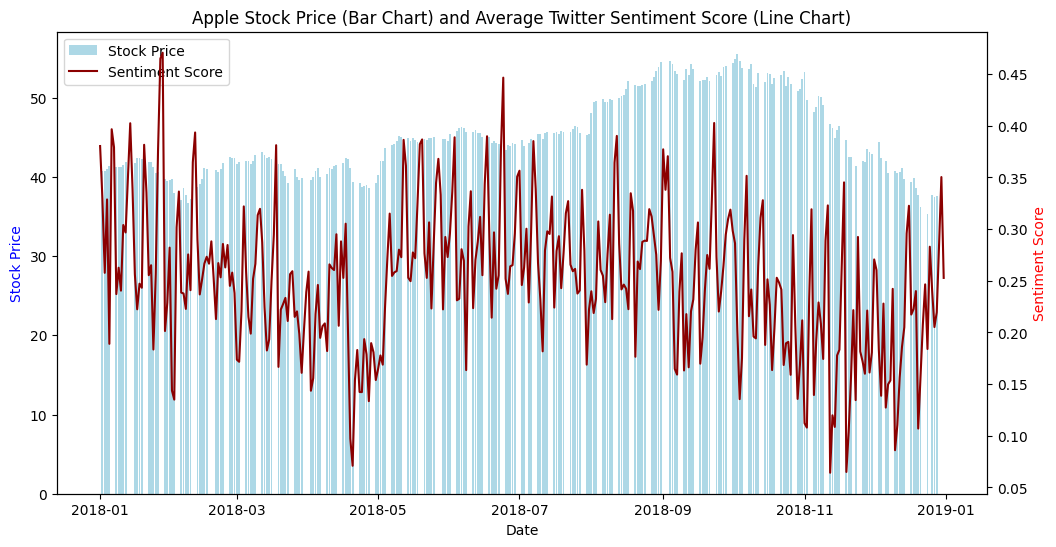

In [14]:
import matplotlib.pyplot as plt

# Extract data from dataframes
dates = full_hist.index
stock_prices = full_hist['Close']
sentiment_scores = daily_sentiment_df['Average Score']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot stock prices as a bar chart on the first axis (left y-axis)
ax1.bar(dates, stock_prices, color='lightblue', label='Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')

# Create a second axis (right y-axis) for sentiment scores
ax2 = ax1.twinx()
ax2.plot(dates, sentiment_scores, color='darkred', label='Sentiment Score')
ax2.set_ylabel('Sentiment Score', color='r')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# Set a title
plt.title('Apple Stock Price (Bar Chart) and Average Twitter Sentiment Score (Line Chart)')

# Show the plot
plt.show()